In [1]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data
data = pd.read_csv('PositionSalaries.csv')

In [3]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
data.shape

(10, 3)

In [5]:
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [7]:
data.isna().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [8]:
corr = data.corr()
corr

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


In [9]:
X = data.iloc[:, 1:2].values
y = data.iloc[:, 2].values

In [10]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [11]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

Text(0.5, 0, 'Level')

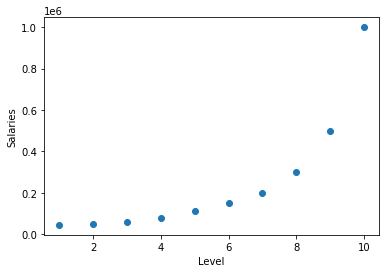

In [12]:
plt.scatter(X,y)
plt.ylabel("Salaries")
plt.xlabel("Level")

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
pred_lr = lin_reg.predict(X)

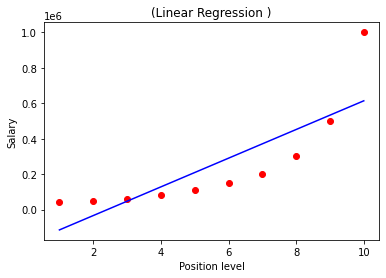

In [14]:
plt.scatter(X, y, color = 'red')
plt.plot(X,pred_lr, color = 'blue')
plt.title('(Linear Regression )')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [15]:
#polynomial regression in degree = 2

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)

poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
pred = lin_reg_2.predict(poly_reg.fit_transform(X))

In [17]:
dataframe =pd.DataFrame({'actual': y,'predicted':pred,"difference":pred - y})
dataframe

,actual,predicted,difference
0,45000,118727.272727,73727.272727
1,50000,44151.515152,-5848.484848
2,60000,8439.393939,-51560.606061
3,80000,11590.909091,-68409.090909
4,110000,53606.060606,-56393.939394
5,150000,134484.848485,-15515.151515
6,200000,254227.272727,54227.272727
7,300000,412833.333333,112833.333333
8,500000,610303.030303,110303.030303
9,1000000,846636.363636,-153363.636364


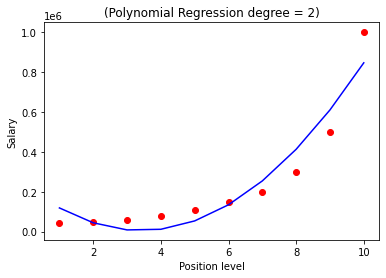

In [18]:
plt.scatter(X, y, color = 'red')
plt.plot(X,pred, color = 'blue')
plt.title('(Polynomial Regression degree = 2)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [19]:
#polynomial regression degree = 15

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 15)
X_poly = poly_reg.fit_transform(X)

poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
pred2 = lin_reg_2.predict(poly_reg.fit_transform(X))

In [21]:
dataframe =pd.DataFrame({'actual': y,'predicted':pred2,"difference":pred2 - y})
dataframe

,actual,predicted,difference
0,45000,45000.003898,0.003898
1,50000,50000.002397,0.002397
2,60000,60000.003666,0.003666
3,80000,80000.001790,0.001790
4,110000,109999.996879,-0.003121
5,150000,149999.998485,-0.001515
6,200000,199999.997154,-0.002846
7,300000,300000.001755,0.001755
8,500000,500000.005341,0.005341
9,1000000,999999.988678,-0.011322


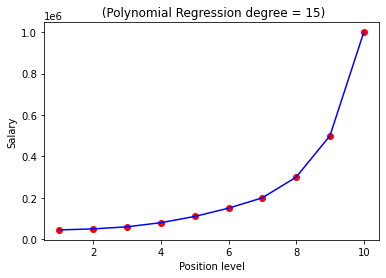

In [22]:
plt.scatter(X, y, color = 'red')
plt.plot(X,pred2, color = 'blue')
plt.title(' (Polynomial Regression degree = 15)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()